<a href="https://colab.research.google.com/github/Taazkir/ML-predicting-house-prices-philadelphia/blob/main/Predicting_House_Prices_in_Philadelphia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [250]:
# https://medium.com/@GaussEuler/philadelphia-housing-data-part-i-data-analysis-fe45415554a9



import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('Phila_housing_data.csv', low_memory=False)
print(df.shape)
print(df.columns)


(520079, 82)
Index(['the_geom', 'the_geom_webmercator', 'assessment_date', 'basements',
       'beginning_point', 'book_and_page', 'building_code',
       'building_code_description', 'category_code',
       'category_code_description', 'census_tract', 'central_air',
       'cross_reference', 'date_exterior_condition', 'depth',
       'exempt_building', 'exempt_land', 'exterior_condition', 'fireplaces',
       'frontage', 'fuel', 'garage_spaces', 'garage_type',
       'general_construction', 'geographic_ward', 'homestead_exemption',
       'house_extension', 'house_number', 'interior_condition', 'location',
       'mailing_address_1', 'mailing_address_2', 'mailing_care_of',
       'mailing_city_state', 'mailing_street', 'mailing_zip', 'market_value',
       'market_value_date', 'number_of_bathrooms', 'number_of_bedrooms',
       'number_of_rooms', 'number_stories', 'off_street_open',
       'other_building', 'owner_1', 'owner_2', 'parcel_number', 'parcel_shape',
       'quality_grade',

In [227]:
# Drop columns that are not valuable
drop_column_list = ['the_geom', 'assessment_date','beginning_point', 'book_and_page',
                    'category_code_description', 'cross_reference', 'house_number',
                    'location', 'mailing_address_1', 'mailing_address_2', 'mailing_care_of',
                    'mailing_city_state', 'mailing_street', 'market_value_date',
                    'the_geom_webmercator','other_building','owner_1', 'owner_2',
                    'parcel_number', 'recording_date', 'sale_date', 'registry_number',
                    'sale_price', 'unit', 'objectid','building_code', 'census_tract',
                    'date_exterior_condition', 'year_built_estimate', 'house_extension',
                    'mailing_zip', 'sewer', 'site_type','state_code', 'street_designation',
                    'street_name', 'street_direction', 'geographic_ward', 'pin',
                    'unfinished', 'utility', 'suffix', 'quality_grade',
                    'separate_utilities', 'building_code_description', 'building_code_new',
                    'building_code_description_new', 'garage_type','interior_condition']

data = df.drop(drop_column_list, axis = 1)

# Drop market values that are zero or missing
data = data.dropna(subset=["market_value"])
data = data.drop(data[data.market_value == 0].index)


In [247]:
# Drop proprties that are not strictly residential houses

# Deleting 'Mixed Use'
data=data.drop(data[data.category_code == 3].index)
# Deleting ‘Commercial’
data=data.drop(data[data.category_code == 4].index)
# Deleting ‘Industrial
data=data.drop(data[data.category_code == 5].index)
# Deleting ‘Vacant Land’
data=data.drop(data[data.category_code == 6].index)
# Deleting 'Garage Commarcial'
data=data.drop(data[data.category_code == 7].index)
# Deleting 'Garage Residential'
data=data.drop(data[data.category_code == 8].index)
# Deleting 'Hotel'
data=data.drop(data[data.category_code == 9].index)
# Deleting 'Office'
data=data.drop(data[data.category_code == 10].index)
# Deleting 'Special Purpose'
data=data.drop(data[data.category_code == 11].index)
# Deleting 'Vacant land non resdidential'
data=data.drop(data[data.category_code == 12].index)
# Deleting 'Vacant land resdidential'
data=data.drop(data[data.category_code == 13].index)
# Deleting 'Apartment > 4 units'
data=data.drop(data[data.category_code == 14].index)
# Deleting 'Retail'
data=data.drop(data[data.category_code == 15].index)
# Deleting 'Blank descriptions'
data=data.drop(data[data.category_code == 16].index)

data.columns
data.shape


(5073, 33)

In [229]:
# Handling 'basements'
print(data.basements.value_counts(dropna=False))

# Basement Codes

# D = Full – Unknown Finish
# F = Partial - Semi-Finished
# H = Partial - Unknown Finish
# C = Full - Unfinished
# A = Full - Finished
# J = Unknown Size - Unfinished
# 0 = No Basement
# E = Partial - Finished
# I = Unknown Size - Finished
# G = Partial - Unfinished
# B = Full - Semi-Finished

# Replacing missing basement with "L" and zero (no basement) with "K"

data.loc[:, "basements"] = data.loc[:, "basements"].fillna('L')
data.loc[:, "basements"] = data['basements'].replace('0', 'K')

NaN    98075
D      61206
F      35890
H      29777
C      26983
A      25925
E       9083
0       7644
J       4361
G       3594
B       2950
I       1156
1        592
4         75
2         20
3          4
Name: basements, dtype: int64


In [230]:
# Handling 'central_air'
print(data.central_air.value_counts(dropna=False))

# Replacing '0' with 'N'
data.loc[:, "central_air"] = data['central_air'].replace('0', 'N')
# Replacing "NaN" with 'N'
data.loc[:, "central_air"] = data['central_air'].fillna('N')
# Replacing '1' with 'Y'
data.loc[:, "central_air"] = data['central_air'].replace('1', 'Y')

NaN    112703
Y       97823
N       95628
0        1066
1         115
Name: central_air, dtype: int64


4.0    227967
3.0     33832
1.0     14594
5.0     12626
2.0     12050
7.0      2475
NaN      2090
6.0      1666
0.0        35
Name: exterior_condition, dtype: int64


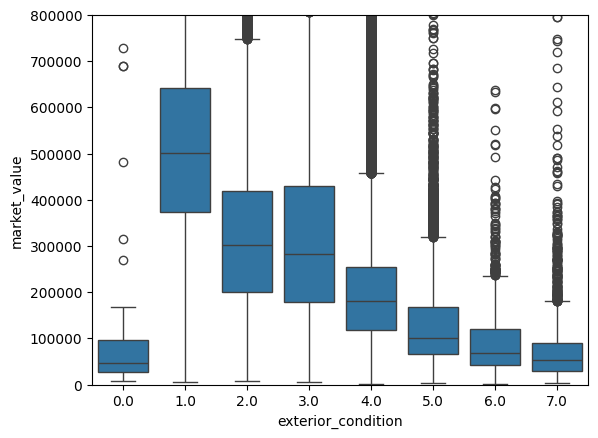

In [231]:
# Handling 'exterior_condition'
print(data.exterior_condition.value_counts(dropna=False))

# Box plot: 'market_value' vs. 'exterior_condition'
condition_df = pd.concat([data['market_value'],
                         data['exterior_condition']], axis=1)

box_fig = sns.boxplot(x='exterior_condition', y="market_value", data=condition_df)
box_fig.axis(ymin=0, ymax=800000)

# Exterior Condition key
'''
0.0 - Not Applicable
1.0 - Best Condition
.
.
.
7.0 - Worst Condition
'''

# Dropping NaN

data = data.dropna(subset=["exterior_condition"])

NaN    259786
A       42891
C        2096
B         390
G          48
E          16
H          11
I           6
D           1
Name: fuel, dtype: int64


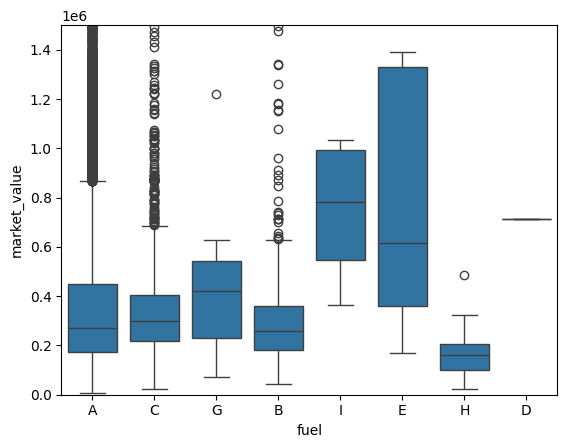

In [232]:
# Handling 'fuel'
print(data.fuel.value_counts(dropna=False))

# Box plot market value vs fuel

fuel_df = pd.concat([data['market_value'],
                         data['fuel']], axis=1)

box_fig = sns.boxplot(x='fuel', y="market_value", data=fuel_df)
box_fig.axis(ymin=0, ymax=1500000)

# Fuel Key
'''
A = Natural Gas
C = Electric
B = Oil heat
E = Solar
G = Other
H = None
I = Unknown
'''
# Replace NaN with G (other) and drop I and D
data.loc[:, "fuel"] = data['fuel'].fillna("G")
data = data.drop(data[data.fuel == "I"].index)
data = data.drop(data[data.fuel == "D"].index)


In [233]:
# Handling longitude and latitude

# FIlling missing longitude and latitude with the mean
data["lng"] = data.lng.fillna(data.lng.mean())
data["lat"] = data.lat.fillna(data.lat.mean())

# Make longitude values positive
data.loc[:, "lng"] = data['lng'].abs()


In [234]:
# Handling 'general_construction'

print(data.general_construction.value_counts(dropna=False))

'''
A = Common brick
B = Brick and Siding
E = Stone
C = Frame and siding
F = Stucco/Cement
G = Other/Mix
H = Brick and stucco
J = Stone/stucco
I = Stucco and siding
D = Frame and shingle
'''
# Dropping NaN values
data = data.dropna(subset=["general_construction"])



A      245680
B       20619
NaN     12102
C        7495
E        6305
F        4599
H        3300
G        1810
J        1123
3         742
I         726
1         245
D         164
5         118
6          78
9          66
4          65
8           1
Name: general_construction, dtype: int64


In [235]:
# Handle 'parcel_shape'

#data.parcel_shape.value_counts(dropna=False)

'''
 E = Rectangular
A = Other than a square, rectangular or triangle
B = Curves, narrow portions, long access driveways
C = Triangular
F = NaN
D = Long and narrow
'''
# Replacing NaNs with F
data.loc[:, "parcel_shape"] = data['parcel_shape'].fillna('F')

<ipython-input-235-3dc9d34c5d87>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, "parcel_shape"] = data['parcel_shape'].fillna('F')


In [236]:
# Handling 'topography'

print(data.topography.value_counts(dropna=False))

# Topography key
'''
F = Street level
A = Above Street Level
E = Other and NaN’s
B = Below Street Level
C = Flood Plain
D = Rocky
'''

# Replacing NaNs with E
data.loc[:, "topography"] = data['topography'].fillna('E')

print(data.topography.value_counts(dropna=False))



F      260058
A       16196
NaN     14025
E        2590
B         132
C          73
D          62
Name: topography, dtype: int64
F    260058
E     16615
A     16196
B       132
C        73
D        62
Name: topography, dtype: int64


<ipython-input-236-a2a35a00c215>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, "topography"] = data['topography'].fillna('E')


In [237]:
# Handling 'type_heater'

# Type Heater key

'''
H = Undetermined
A = Hot air (ducts)
B = Hot water (radiators or baseboards)
G = Radiant
N = None
C = Electric baseboard
E = Other
D = Outside heat pump
'''

data.loc[:, "type_heater"] = data['type_heater'].fillna('N')



I      271753
A        8990
C        4463
0        1740
H        1571
D        1535
NaN      1254
E        1188
B         642
Name: view_type, dtype: int64


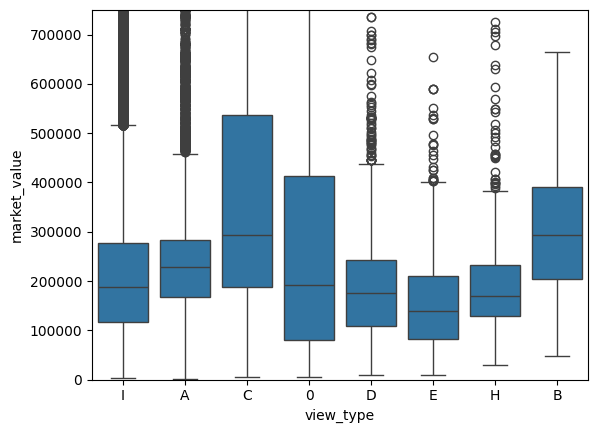

In [238]:
# Handling 'view_type'
print(data.view_type.value_counts(dropna=False))

# Type view_type

'''
I = Typical/Other
A = Cityscape / Skyline
C = Park / Green Area
D = Commercial
N = Not Applicable
H = Industrial
E = Edifice / Landmark
B = Flowing Water
0 = Unknown

Ranking of view types:
0, C, A, B, I, D, H E
'''
view_df = pd.concat([data['market_value'],
                         data['view_type']], axis=1)

box_fig = sns.boxplot(x='view_type', y="market_value", data=view_df)
box_fig.axis(ymin=0, ymax=750000)

# Drop NaN
data = data.dropna(subset=["view_type"])



In [239]:
# Handling ‘number_of_rooms’, ‘number_of_bedrooms’, ‘number_of_bathrooms’

data.number_of_bathrooms.value_counts(dropna=False)
data.number_of_bedrooms.value_counts(dropna=False)
data.number_of_rooms.value_counts(dropna=False)


data = data.dropna(subset=['number_of_rooms', 'number_of_bedrooms', 'number_of_bathrooms'])

In [240]:
# Handling garage_spaces

print(data.garage_spaces.value_counts(dropna=False))
data = data.dropna(subset=['garage_spaces'])

0.0    3954
1.0    1181
NaN     649
2.0     480
3.0      34
4.0      18
5.0       1
6.0       1
Name: garage_spaces, dtype: int64


In [241]:
# Handling fireplaces

print(data.fireplaces.value_counts(dropna=False))
data = data.dropna(subset=['fireplaces'])

0.0     4712
1.0      414
NaN      379
2.0       88
3.0       39
5.0       20
4.0       16
10.0       1
Name: fireplaces, dtype: int64


In [242]:
# Drop missing and 0 depth
data = data.dropna(subset=["depth"])
data = data.drop(data[data.depth == 0].index)

In [243]:
# Handling off_street_open

print(data.off_street_open.value_counts(dropna=False))
data = data.dropna(subset=['off_street_open'])

NaN       175
4130.0     26
2095.0     20
4965.0     18
3332.0     17
         ... 
1212.0      1
131.0       1
1009.0      1
7113.0      1
2821.0      1
Name: off_street_open, Length: 1821, dtype: int64


In [244]:
# Handling zoning

print(data.zoning.value_counts(dropna=False))
data = data.dropna(subset=['zoning'])

RSA5      3212
RM1        725
RSA3       554
RSD3       137
RSA2       123
RSD1       113
CMX2        77
RSA1        24
CMX1        23
RTA1        22
I2          13
ICMX        11
CMX2.5       7
RSA6         7
RSA4         7
RMX1         7
CMX3         4
RSD2         3
RM4          2
NaN          2
RM2          1
CMX4         1
Name: zoning, dtype: int64


In [246]:
check_NaN = data.isna().sum()
print(check_NaN)
data


basements               0
category_code           0
central_air             0
depth                   0
exempt_building         0
exempt_land             0
exterior_condition      0
fireplaces              0
frontage                0
fuel                    0
garage_spaces           0
general_construction    0
homestead_exemption     0
market_value            0
number_of_bathrooms     0
number_of_bedrooms      0
number_of_rooms         0
number_stories          0
off_street_open         0
parcel_shape            0
street_code             0
taxable_building        0
taxable_land            0
topography              0
total_area              0
total_livable_area      0
type_heater             0
view_type               0
year_built              0
zip_code                0
zoning                  0
lat                     0
lng                     0
dtype: int64


,basements,category_code,central_air,depth,exempt_building,exempt_land,exterior_condition,fireplaces,frontage,fuel,...,topography,total_area,total_livable_area,type_heater,view_type,year_built,zip_code,zoning,lat,lng
434,L,1,N,80.0,111280.0,27820.0,4.0,0.0,16.0,G,...,F,1246.0,1434.0,N,I,1940.0,19144.0,RSA5,40.039868,75.154079
543,E,1,Y,105.0,0.0,0.0,1.0,0.0,68.0,A,...,F,7140.0,3070.0,A,I,2023.0,19114.0,RSD1,40.057764,74.989302
941,C,1,N,54.0,0.0,0.0,4.0,0.0,14.0,A,...,F,756.0,896.0,A,I,1920.0,19145.0,RM1,39.927839,75.184498
1015,C,1,N,53.0,0.0,0.0,5.0,0.0,18.0,A,...,F,945.0,984.0,A,I,1920.0,19142.0,RM1,39.924432,75.234750
1038,L,2,N,39.0,0.0,0.0,4.0,0.0,70.0,A,...,F,3522.0,3196.0,B,I,1965.0,19119.0,RSA5,40.055362,75.190235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351841,E,1,Y,128.0,80000.0,0.0,4.0,1.0,10.0,G,...,A,4086.0,1672.0,A,I,1940.0,19150.0,RSA5,40.072854,75.161076
351880,D,1,Y,94.0,80000.0,0.0,3.0,1.0,79.0,A,...,A,6935.0,2331.0,B,I,1871.0,19118.0,RSD3,40.071624,75.208009
351914,L,1,Y,106.0,80000.0,0.0,4.0,0.0,30.0,G,...,F,3229.0,1753.0,N,I,2006.0,19121.0,RSA3,39.977062,75.166179
352120,H,1,N,110.0,80000.0,0.0,4.0,0.0,17.0,G,...,F,1815.0,1386.0,A,I,1950.0,19138.0,CMX2,40.068306,75.157484
